In [1]:
import pandas as pd
import numpy as np  
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
# 中文和负号的正常显示
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
# 设置绘图风格
plt.style.use('ggplot')
# 读取数据集
df = pd.read_excel('控江IM.xlsx')
# 查看数据集的前8行
df.head(8)

,分行,工号,姓名,23s响应率,唯一会话量,录入率
0,靖宇东路A分行,22129996,张兵,0.833333,35,0.285714
1,泰鸿A分行,22155846,孟军平,0.791667,25,0.120000
2,长虹分行,22220741,刁忠孝,0.866667,11,0.000000
3,新凤城分行,22217990,张冲,0.750000,30,0.266667
4,黄兴B分行,26581850,荣用兴,0.666667,3,0.000000
5,靖宇东路A分行,22246710,单洁,0.631579,23,0.043478
6,长白新城A分行,26060884,侯家健,0.750000,13,0.000000
7,泰鸿B分行,26585983,潘子贤,0.142857,6,0.166667


In [2]:
# 数据标准化
X = preprocessing.minmax_scale(df[['23s响应率','唯一会话量','录入率']])
# 将数组转换为df
X = pd.DataFrame(X, columns=['23s响应率','唯一会话量','录入率'])
X.head()

,23s响应率,唯一会话量,录入率
0,0.833333,0.441558,0.571429
1,0.791667,0.311688,0.240000
2,0.866667,0.129870,0.000000
3,0.750000,0.376623,0.533333
4,0.666667,0.025974,0.000000


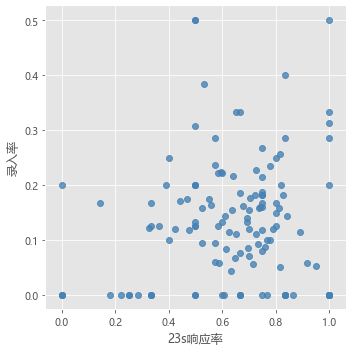

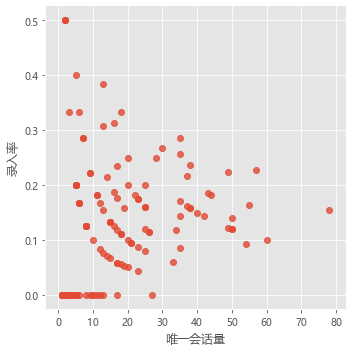

In [3]:
# 绘制唯一会话量与录入率的散点图
sns.lmplot(x = '23s响应率', y = '录入率', data = df, 
           fit_reg = False, scatter_kws = {'alpha':0.8, 'color': 'steelblue'})
sns.lmplot(x = '唯一会话量', y = '录入率', data = df, 
           fit_reg = False, scatter_kws = {'alpha':0.8})
plt.show()

## 拐点法

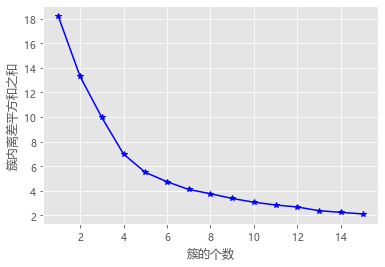

In [4]:
# 构造自定义函数，用于绘制不同k值和对应总的簇内离差平方和的折线图
def k_SSE(X, clusters):
    # 选择连续的K种不同的值
    K = range(1,clusters+1)
    # 构建空列表用于存储总的簇内离差平方和
    TSSE = []
    for k in K:
        # 用于存储各个簇内离差平方和
        SSE = []
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        # 返回簇标签
        labels = kmeans.labels_
        # 返回簇中心
        centers = kmeans.cluster_centers_
        # 计算各簇样本的离差平方和，并保存到列表中
        for label in set(labels):
            SSE.append(np.sum((X.loc[labels == label,]-centers[label,:])**2))
        # 计算总的簇内离差平方和 
        TSSE.append(np.sum(SSE))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')
    # 绘制K的个数与GSSE的关系
    plt.plot(K, TSSE, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('簇内离差平方和之和')
    # 显示图形
    plt.show()
    
# 使用拐点法选择最佳的K值
k_SSE(X, 15)

## 轮廓系数法

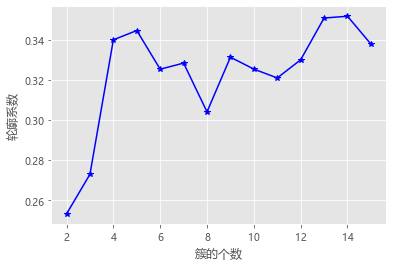

In [5]:
# 构造自定义函数，用于绘制不同k值和对应轮廓系数的折线图
def k_silhouette(X, clusters):
    K = range(2,clusters+1)
    # 构建空列表，用于存储个中簇数下的轮廓系数
    S = []
    for k in K:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 调用字模块metrics中的silhouette_score函数，计算轮廓系数
        S.append(metrics.silhouette_score(X, labels, metric='euclidean'))

    # 中文和负号的正常显示
    plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    plt.rcParams['axes.unicode_minus'] = False
    # 设置绘图风格
    plt.style.use('ggplot')    
    # 绘制K的个数与轮廓系数的关系
    plt.plot(K, S, 'b*-')
    plt.xlabel('簇的个数')
    plt.ylabel('轮廓系数')
    # 显示图形
    plt.show()
    
# 使用轮廓系数选择最佳的K值
k_silhouette(X, 15)

In [7]:
# 将数据集聚为5类
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)
# 将聚类结果标签插入到数据集中
df['cluster5'] = kmeans.labels_
# 构建空列表，用于存储k个簇的簇中心
centers = []
for i in df.cluster5.unique():
    centers.append(df.ix[df.cluster5 == i,['23s响应率','唯一会话量','录入率']].mean())
# 将列表转换为数组，便于后面的索引取数
centers = np.array(centers)
centers

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


array([[6.41107895e-01, 4.31785714e+01, 1.67664028e-01],
       [6.74668315e-01, 1.61000000e+01, 1.41412599e-01],
       [8.50035613e-01, 7.05000000e+00, 8.07275542e-03],
       [2.50679730e-01, 6.52631579e+00, 4.64912281e-02],
       [7.29744651e-01, 7.83333333e+00, 3.73019689e-01]])

In [8]:
print(df.groupby('cluster5').mean())

                    工号    23s响应率      唯一会话量       录入率
cluster5                                             
0         2.455104e+07  0.850036   7.050000  0.008073
1         2.218819e+07  0.641108  43.178571  0.167664
2         2.279969e+07  0.674668  16.100000  0.141413
3         2.449665e+07  0.250680   6.526316  0.046491
4         2.474896e+07  0.729745   7.833333  0.373020


In [9]:
df.to_excel('控江经纪人聚类5.xlsx')

In [10]:
# 导入第三方模块
import pygal
# 调用Radar这个类，并设置雷达图的填充，及数据范围
radar_chart = pygal.Radar(fill = True)
# 雷达图
# 调用模型计算出来的簇中心
centers_std = kmeans.cluster_centers_
# 设置填充型雷达图
radar_chart = pygal.Radar(fill = True)
# 添加雷达图各顶点的名称
radar_chart.x_labels = ['23s响应率','唯一会话量','录入率']

# 绘制雷达图代表三个簇中心的指标值
radar_chart.add('C1', centers_std[0])
radar_chart.add('C2', centers_std[1])
radar_chart.add('C3', centers_std[2])
radar_chart.add('C4', centers_std[3])
radar_chart.add('C5', centers_std[4])
# 保存图像
radar_chart.render_to_file('radar_chart.svg')

[[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244DB16F088>


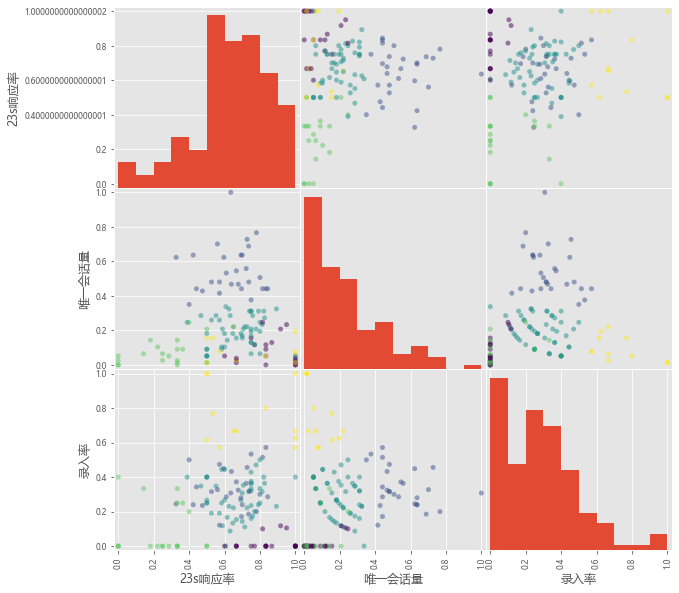

In [11]:
print(pd.plotting.scatter_matrix(X, c=df.cluster5, figsize=(10,10), s=100))

In [12]:
from sklearn import metrics  
# 计算轮廓系数
score = metrics.silhouette_score(X,df.cluster5) 
print(score)

0.34458411234863373
